# Interpolation

## 07.01 Interpolation

Given input data such as:
$$
(t_1, y_1), (t_2, y_2), \cdots, (t_m, y_m) \quad t_1 < t_2 < \cdots < t_m
$$

determine a function $f : \mathbb{R} \rightarrow \mathbb{R}$ such that:
$$
f(t_i) = y_i \quad i = 1, \cdots, m
$$

$f$ is referred to as **interpolating function**

Additional constraints might be imposed:
* smoothness
* monotonicity
* convexity

Use cases:
* graaphics or plotting
* differentiating or integrating 
* replacing complex function with simpler one

#### Interpolation vs. Approximation
Interpolation fits given input data points **exactly** whereas approximation does not.

Example of approximation: Smooth noisy data using least squares.

#### Basis Functions
Family of functions for interpolating data points spanned by a set of basis functions $\phi_1(t), \cdots, \phi_n(t)$.

Interpolating function $f$ is linear combination of basis functions:
$$
f(t_i) = \sum_{j=1}^{n} x_j \phi_j (t_i) = y_i
$$
where
* $x$ is an n-vector of parameters
* $\phi_j (t_i)$ is the value of *jth* basis function at $t_i$ forms an $m \times n$ matrix $A$
* $y$ is the product of the linear system $Ax$

#### Existence, Uniqueness, and Conditioning
Existence depends on the number of data points $m$ and basis functions $n$.
* If $m > n$, then interpolant usually doesn't exist.
* If $m < n$, then interpolant is not unique.
* If $m = n$, then basis matrix $A$ is nonsingular and data can be fit exactly.

Sensitivity of $x$ depends on $\text{cond}(A)$ which depends on basis functions.

## 07.02 Polynomial Interpolation

Unique polynomial of degree $n-1$ passsing through $n$ distinct data points.

#### Monomial Basis
Basis functions given by sequential powers:
$$
\phi_j (t) = t^{j-1} \quad j=1, \cdots, n
$$

Polynomial evaluated at $t_i$ with this basis:
$$
p_{n-1} (t_i) = x_1 + x_2 t_i + x_3 t_i^2 + \cdots + x_n t_i^{n-1}
$$

The $n \times n$ matrix is known as **Vandermonde matrix**:
$$
Ax = \begin{bmatrix}
1 & t_1 & t_1^2 & \cdots & t_1^{n-1} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & t_n & t_n^2 & \cdots & t_n^{n-1} \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix}
$$

For monomial basis, matrix $\text{cond}(A)$ increases with degree of polynomial.
* Ill-conditioning does not prevent us from fitting points.
* Residuals at fitted data points is zero.
* Coefficients will be poorly determined.
* Relatively high cost to solve linear system $O(n^3)$.
* Scaling can help reduce the growth in condition number.

#### Horner's Rule
Rather than explicitly compute powers, performed nested multiplications of $n$ additions and $n$ multiplications.
$$
p_{n-1} (t_i) = x_1 + t_i (x_2 + t_i (x_3 + t_i (\cdots + (x_{n-1} + tx_n) \cdots)))
$$

Determine the polynomial of degree 2 used to interpolate 3 ($m=3$) data points.

In [1]:
import numpy as np

# Input data $(t_i, y_i)$.
m = 3
t = np.array([-2,0,1], dtype='d')
y = np.array([-27,-1,0], dtype='d')

# Solve Ax = y for x.
A = np.column_stack((np.ones(m), t, t*t))
x = np.linalg.solve(A, y)
print("x: ", x)

# Evaluate the polynomial at the data points.
vft = np.vectorize(lambda t: x[0] + t*(x[1] + x[2]*t))  # Horner's rule.
yhat = vft(t)
np.testing.assert_almost_equal(y - yhat, np.zeros(m))

x:  [-1.  5. -4.]


Plot the observations against the fit using polynomial interpolation.

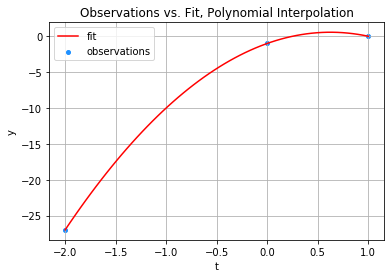

In [2]:
import matplotlib.pyplot as plt

%matplotlib inline

# Fit the model to a dense 1D-grid of points from [t_min, t_max].
fitn = m*20
fitx = np.linspace(np.min(t), np.max(t), fitn)  # Actually t.
fity = vft(fitx)

# Plot the fitted model against observations.
plt.scatter(t, y, s=16, c='dodgerblue', label='observations')
plt.plot(fitx, fity, c='red', label='fit')
plt.title('Observations vs. Fit, Polynomial Interpolation')
plt.ylabel('y')
plt.xlabel('t')
plt.grid()
plt.legend()
plt.show()

## 07.03 Lagrange and Newton Interpolation

#### Lagrange Basis
The Vandermonde matrix for the Lagrange basis is the identity matrix.
$$
l_j(t) = \prod_{k=1,k \neq j}^n (t - t_k) / \prod_{k=1,k \neq j}^n (t_j - t_k) \quad j = 1,\cdots,n
$$

Polynomial evaluated at $t_i$ with this basis:
$$
p_{n-1}(t_i) = y_1 l_1(t_i) + y_2 l_2(t_i) + \cdots + y_n l_n(t_i)
$$

Lagrange form of a polynomial obtained for $m$ data points will give same result as $m-1$ degree polynomial obtained using monomial basis.

Cost of computing the weights is $O(n^2)$ (less than solving linear system as is the case for monomial basis) and cost of evaluating the interpolant is $O(n)$.

#### Newton Interpolation
Newton basis functions given by:
$$
\pi_j(t) = \prod_{k=1}^{j-1} (t - t_k) \quad j = 1,\cdots,n
$$

Polynomial evaluated at $t_i$ with this basis:
$$
p_{n-1}(t_i) = x_1 + x_2(t - t_1) + x_3(t - t_1)(t - t_2) + \cdots + x_n(t - t_1)(t - t_2)\cdots(t - t_{n-1})
$$
* Avoid repeated computations using Horner's rule.

The basis matrix $A$ formed from the linear combination of these basis functions is lower triangular and can be solved using forward substitution (cost = $O(n^2)$).

Newton basis functions can be constructed incrementally.
* Given $m$ data points and an interpolating polynomial of degree $m-1$, then a new interpolating polynomial of degree $m + n - 1$ can be constructed for any additional $n$ data points using Newton interpolation 

Use Lagrange interpolation to interpolate 3 ($m = 3$) data points.

In [3]:
import numpy as np
import scipy.interpolate as interp

# Input data $(t_i, y_i)$.
m = 3
t = np.array([-2,0,1], dtype='d')
y = np.array([-27,-1,0], dtype='d')

# Implement L1, L2, and L3.
# L1 = \frac{(x-t_2)(x-t_3)}{(t_1-t_2)(t_1-t_3)}
L1 = lambda x: ((x-t[1])*(x-t[2]))/((t[0]-t[1])*(t[0]-t[2]))
# L2 = \frac{(x-t_1)(x-t_3)}{(t_2-t_1)(t_2-t_3)}
L2 = lambda x: ((x-t[0])*(x-t[2]))/((t[1]-t[0])*(t[1]-t[2]))
# L3 = \frac{(x-t_1)(x-t_2)}{(t_3-t_1)(t_3-t_2)}
L3 = lambda x: ((x-t[0])*(x-t[1]))/((t[2]-t[0])*(t[2]-t[1]))

# Implement the polynomial p_2(x).
p2x = lambda x: np.dot(y, np.array([L1(x), L2(x), L3(x)]))

# Evaluate the polynomial at the data points.
vp2x = np.vectorize(p2x)
yhat = vp2x(t)
np.testing.assert_almost_equal(y - yhat, np.zeros(m))

# Compare to polynomial returned from scipy.interpolate.lagrange.
poly = interp.lagrange(t, y)
x = np.linspace(np.min(t), np.max(t), num=100)
np.testing.assert_almost_equal(vp2x(x), poly(x))

Plot the observations against the fit using Lagrange interpolation.

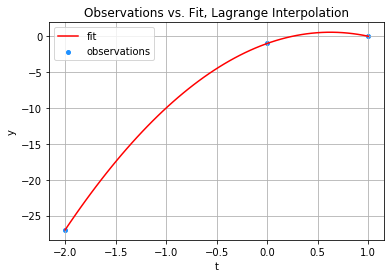

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

# Fit the model to a dense 1D-grid of points from [t_min, t_max].
fitn = m*20
fitx = np.linspace(np.min(t), np.max(t), fitn)  # Actually t.
fity = vp2x(fitx)

# Plot the fitted model against observations.
plt.scatter(t, y, s=16, c='dodgerblue', label='observations')
plt.plot(fitx, fity, c='red', label='fit')
plt.title('Observations vs. Fit, Lagrange Interpolation')
plt.ylabel('y')
plt.xlabel('t')
plt.grid()
plt.legend()
plt.show()

Use Newton interpolation to interpolate 3 ($m = 3$) data points.

In [5]:
import numpy as np
import scipy.linalg as la

# Input data $(t_i, y_i)$.
m = 3
t = np.array([-2,0,1], dtype='d')
y = np.array([-27,-1,0], dtype='d')


def newton_basis(t):
    """
    Return the lower triangular basis matrix used by Newton interpolation.
    """
    A = np.zeros((t.size, t.size))
    for i in range(t.size):
        aij = 1.
        for j in range(i+1):
            A[i,j] = aij
            # a_{ij} = \pi_{j=1}^n (t_i - t_j)
            aij = aij * (t[i]-t[j])
    return A


# Solve Lx = y for x using forward substitution.
A = newton_basis(t)
x = la.solve_triangular(A, y, lower=True, unit_diagonal=False)
print("x: ", x)

# Implement the polynomial p_2(t_i).
p2ti = lambda ti: x[0] + x[1]*(ti-t[0]) + x[2]*(ti-t[0])*(ti-t[1])

# Evaluate the polynomial at the data points.
vp2ti = np.vectorize(p2ti)
yhat = vp2ti(t)
np.testing.assert_almost_equal(y - yhat, np.zeros(m))

x:  [-27.  13.  -4.]


Plot the observations against the fit using Newton interpolation.

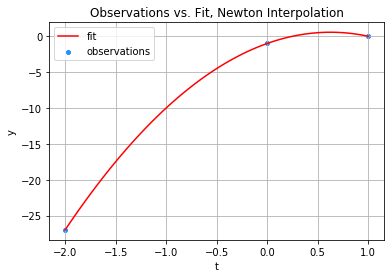

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

# Fit the model to a dense 1D-grid of points from [t_min, t_max].
fitn = m*20
fitx = np.linspace(np.min(t), np.max(t), fitn)  # Actually t.
fity = vp2ti(fitx)

# Plot the fitted model against observations.
plt.scatter(t, y, s=16, c='dodgerblue', label='observations')
plt.plot(fitx, fity, c='red', label='fit')
plt.title('Observations vs. Fit, Newton Interpolation')
plt.ylabel('y')
plt.xlabel('t')
plt.grid()
plt.legend()
plt.show()

## 07.04 Orthogonal Polynomials

#### Inner Product

Inner product of polynomials on interval $[a, b]$ given by:
$$
\langle p, q \rangle = \int_a^b p(t) q(t) w(t) dt
$$
where
* $w(t)$ is a **weight function**

Polynomials $p$ and $q$ are orthogonal if $\langle p, q \rangle = 0$.

Set of polynomials $\{p_i\}$ are orthonormal if they are mutally orthogonal and the magnitude of each polynomial is 1.
* Similar to vectors, but object is a polynomial.

If we apply Gram-Schmidt process with the weight function defined below to a set of polynomials $\{p_i\}$ then we obtain a family of orthogonal polynomials bearing the names listed below.

| Name | Symbol | Interval | Weight Function, $f(t)$ |
|------|--------|----------|-------------------------|
| Legendre | $P_k$ | $[-1, 1]$ | 1 &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; |
| Chebyshev, 1st | $T_k$ | $[-1, 1]$ | $(1 - t^2)^{-1/2}$ |
| Chebyshev, 2nd | $U_k$ | $[-1, 1]$ | $(1 - t^2)^{1/2}$ |
| Jacobi | $J_k$ | $[-1, 1]$ | $(1 - t)^{\infty} (1 + t)^{\beta}$ |
| Laguerre | $L_k$ | $[0, \infty]$ | $e^{-t}$ |
| Hermite | $H_k$ | $[-\infty, \infty]$ | $e^{-t^2}$ |

#### Chebyshev Polynomials
**Equi-oscillation property:** successive extrema of $T_k$ are equal in magnitude and opposite in sign.
* Distributes error uniformly when approximating continuous functions.

## 07.05 Convergence

Question: When you interpolate a continous function, $f(t)$, by a polynomial, $p_{n-1}(t)$, at a given set of sample points, how much can the polynomial differ from the continuous function between the data points?

1. Tight Bounds, to be applied at some point $\theta$ in $[t_1, t_n]$
$$
f(t) - p_{n-1}(t) = \frac{f^{(n)}(\theta)}{n!} (t-t_1)(t-t_2)\cdots(t-t_n)
$$
where
  * $f^{(n)}(\theta)$ is the nth derivative of $f(t)$ at some point $\theta$ in $[t_1, t_n]$
  
2. Loose Bounds, to be applied across the entire interval $[t_1, t_n]$
$$
\max_{t \in [t_1, t_n]} |f(t) - p_{n-1}(t)| \leq \frac{Mh^n}{4n}
$$
where
  * $M$ is an upper bound on $f^{(n)}(\theta)$
  * $h$ is the maximum spacing between samples
  * $n$ is the number of samples

#### Expected Accuracy
* Equally spaced sample points are expected to have inflated errors at the extrema of the interval $[t_1, t_n]$.
* Sample points spaced at Chebyshev points distribute the error more evenly, resulting in smaller errors at the extrema.
* Avoid high degree polynomial interpolants.
  * A polynomial of degree $n$ has $n-1$ inflection points and these oscillations may bear no relation to the data to be fit. 
  * The cost to determine and evaluate a polynomial increases with $n$.


#### Truncated Taylor Series
For completeness, consider Taylor series approximation of $f(t)$ when $t$ near $a$ as a polynomial interpolant of exactly one sample $(a, y)$.
$$
p_n(t) = f(a) + f'(a)(t-a) + \frac{f''(a)}{2}(t-a)^2 + \cdots + \frac{f^{(n)}(a)}{n!}(t-a)^n
$$

Compare the Taylor approximation of $f(t) = ln(t)$ at $t = 1$ for Taylor polynomial of degree 0 to 4.

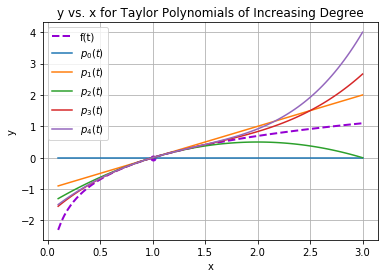

In [7]:
import math

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Define f(t), f'(t), f''(t), ..., f^{(4)}(t).
ft = lambda t: math.log(t)
d1ft = lambda t: 1./t
d2ft = lambda t: -1./math.pow(t, 2)
d3ft = lambda t: 2./math.pow(t, 3)
d4ft = lambda t: -6./math.pow(t, 4)

# Define Taylor series approximation of f(t) for t near a.
a = 1.
p0n = lambda t: ft(a)
p1n = lambda t: p0n(t) + d1ft(a)*(t-a)
p2n = lambda t: p1n(t) + (d2ft(a)/2.)*math.pow(t-a, 2)
p3n = lambda t: p2n(t) + (d3ft(a)/6.)*math.pow(t-a, 3)
p4n = lambda t: p3n(t) + (d3ft(a)/24.)*math.pow(t-a, 4)

# Define the points to sample along the x axis.
numt = 100.
t0, tN = 0.1, 3.
t = np.linspace(t0, tN, num=numt)

# Define a list of functions to plot and their labels.
funcs = [p0n, p1n, p2n, p3n, p4n]
labels = ["$p_0(t)$", "$p_1(t)$", "$p_2(t)$", "$p_3(t)$", "$p_4(t)$"]

# Plot the true function and a marker at (a, y).
vft = np.vectorize(ft)
plt.plot(t, vft(t), 
         linewidth=2., linestyle='--', c='darkviolet', label='f(t)')
plt.plot(a, vft(a), marker='o', markersize=5.0, c='darkviolet')

# Plot the Taylor series approximations of increasing degree.
for func, label in zip(funcs, labels):
    vft = np.vectorize(func)
    plt.plot(t, vft(t), label=label)

plt.title('y vs. x for Taylor Polynomials of Increasing Degree')
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.legend()
plt.show()

## 07.06 Piecewise Polynomial Interpolation

Fit large number of samples with low-degree polynomials to avoid excessive oscillations in the interpolant.
* Break the interval $[t_1, t_n]$ into $k$ subintervals.
* Each point at which interpolant changes referred to as **knot** or **breakpoint**.
* At degree of 1, sacrifices smoothness to eliminate oscillation.

#### Hermite Cubic Interpolation
Hermite cubic interpolant is piecewise cubic polynomial interpolant.
* Assume $n$ knots with $n-1$ piecewise subintervals.
* For each knot, there are 4 parameters, $x$, in the cubic eg $p_{3}(t) = x_0 + x_1 t + x_2 t^2 + x_3 t^3$.
* As a result, there are $4(n-1)$ parameters to be determined.
  * Input samples give $2(n-1)$ equations at each subinterval.
  * Derivatives give $n-2$ equations at each subinterval.
  * This still leaves $n$ free parameters to be chosen.

#### Cubic Spline Interpolation
Cubic spline is piecewise cubic polynomial interpolant that is twice differentiable.
* Assume $n$ knots with $n-1$ piecewise subintervals.
* For each knot, there are 4 parameters, $x$, in the cubic eg $p_{3}(t) = x_0 + x_1 t + x_2 t^2 + x_3 t^3$.
* As a result, there are $4(n-1)$ parameters to be determined.
  * Input samples give $2(n-1)$ equations at each subinterval.
  * Derivatives give $n-2$ equations at each subinterval.
  * Second derivative give $n-2$ equations at each subinterval.
  * This still leaves 2 free parameters to be chosen.

#### Example: Cubic Spline Interpolation
Determine the system of equations required to solve a cubic spline interpolation for 3 data points $(t_1, y_1), (t_2, y_2), (t_3, y_3)$.

For $3$ knots there are $3-1=2$ subintervals and thus $4*2=8$ parameters which we refer to as $\alpha$ and $\beta$.

The polynomial for the first interval $[t_1, t_2]$ given by coefficients $\alpha$ and for the second interval $[t_2, t_3]$ given by coefficients $\beta$:
$$
p_{[t_1, t_2]}(t) = \alpha_1 + \alpha_2 t + \alpha_3 t^2 + \alpha_4 t^3 \\
p_{[t_2, t_3]}(t) = \beta_1 + \beta_2 t + \beta_3 t^2 + \beta_4 t^3
$$

The system of equations is given by:
$$
\begin{bmatrix}
1 & t_1 & t_1^2 & t_1^3 & 0 & 0 & 0 & 0 \\
1 & t_2 & t_2^2 & t_2^3 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & t_2 & t_2^2 & t_2^3 \\
0 & 0 & 0 & 0 & 1 & t_3 & t_3^2 & t_3^3 \\
0 & 1 & 2 t_2 & 3 t_2^2 & 0 & -1 & -2 t_2 & -3 t_2^2 \\
0 & 0 & 2 & 6 t_2 & 0 & 0 & -2 & -6 t_2 \\
0 & 0 & 2 & 6 t_1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 2 & 6 t_3 \\
\end{bmatrix}
\begin{bmatrix}
\alpha_1 \\
\alpha_2 \\ 
\alpha_3 \\ 
\alpha_4 \\
\beta_1 \\
\beta_2 \\ 
\beta_3 \\ 
\beta_4
\end{bmatrix} =
\begin{bmatrix}
y_1 \\
y_2 \\
y_2 \\
y_3 \\
0 \\
0 \\
0 \\
0
\end{bmatrix}
$$

In this system:
* Rows 1-4 ensure the interpolant is an exact fit at each data point.
* Row 5 gives the first derivative at $t_2$.
* Row 6 gives the second derivative at $t_2$.
* Row 7 ensures the second derivative at $t_1$ is 0.
* Row 8 ensures the second derivative at $t_3$ is 0.

Use cubic spline interpolation to interpolate 3 ($m=3$) data points.

In [8]:
import numpy as np
import scipy.interpolate as interp

# Input data $(t_i, y_i)$.
m = 3
t = np.array([-2,0,1], dtype='d')
y = np.array([-27,-1,0], dtype='d')

# Construct a cubic spline interpolator.
cs = interp.CubicSpline(t, y)

# Evaluate the interpolator at the data points.
np.testing.assert_almost_equal(y - cs(t), np.zeros(m))

Plot the observations against the fit using cubic spline interpolation.

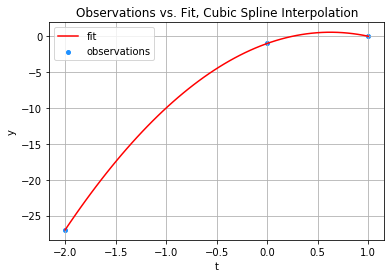

In [9]:
import matplotlib.pyplot as plt

%matplotlib inline

# Fit the model to a dense 1D-grid of points from [t_min, t_max].
fitn = m*20
fitx = np.linspace(np.min(t), np.max(t), fitn)  # Actually t.
fity = cs(fitx)

# Plot the fitted model against observations.
plt.scatter(t, y, s=16, c='dodgerblue', label='observations')
plt.plot(fitx, fity, c='red', label='fit')
plt.title('Observations vs. Fit, Cubic Spline Interpolation')
plt.ylabel('y')
plt.xlabel('t')
plt.grid()
plt.legend()
plt.show()

## 07.08 B-splines

B-splines are basis functions for spline functions of any degree.
* Can be defined in various ways: recursion, convolution, and divided differences.
* Linear function used in recursive definition.
$$
v_i^k(t) = \frac{t - t_i}{t_{i+k} - t_i}
$$

## Summary: Interpolation

* Interpolating functions are **exact** fit at sample points.
* Interpolating functions are linear combinations of basis functions with coefficients determined depending on choice of technique.
* Polynomial interpolation.
  * Coefficients for Lagrange interpolation are cheaper to compute and better conditioned than monomial interpolation, but evaluation is about the same.
  * Coefficients for Newton interpolation can be constructed incrementally.
  * Convergence depends on location of sample points.
    * Equally spaced sample points are expected to have inflated errors at the extrema.
    * Sample points spaced at Chebyshev points distribute the error more evenly.
* Piecewise polynomial interpolation.
  * Used to fit large number of samples with low-degree polynomials.
  * Cubic spline is preferred when smoothness is important.